# **Foundations of Data Science Fall 2022 - Homework 2 (30 points)**

### Student Name: Yamini Lakshmi Narasimhan
### Student Net Id: yl9822

---

### **Part 1: Preparing a Training Set and Training a Decision Tree (10 Points)**

---




This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Brightspace).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

In [1]:
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [2]:
# Place your code here
import pandas as pd
import numpy as np

df = pd.read_csv("./cell2cell_data.csv")

print("Total data",len(df))
percent = np.random.rand(len(df)) <= 0.8
train_df = df[percent]
test_df = df[~percent]

print("Train df",len(train_df))
print("Test df",len(test_df))

train_X = train_df.loc[:, train_df.columns != "churndep"]
train_Y = train_df["churndep"]


test_X = test_df.loc[:, test_df.columns != "churndep"]
test_Y = test_df["churndep"]

Total data 39833
Train df 31951
Test df 7882


In [3]:
print(train_df["churndep"].value_counts())
print(test_df["churndep"].value_counts())

0    15977
1    15974
Name: churndep, dtype: int64
0    3973
1    3909
Name: churndep, dtype: int64


In [4]:
df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [5]:
# Place your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_X, train_Y)


DecisionTreeClassifier(criterion='entropy')

3\. Using the resulting model from 1.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

{'revenue': 0.26670740553298816, 'eqpdays': 0.245072683351932, 'outcalls': 0.18701913166536377, 'incalls': 0.12688332321334495, 'months': 0.08860387604425378, 'marryyes': 0.025770329551172436, 'creditcd': 0.019889645830896786, 'pcown': 0.01882041242271449, 'travel': 0.010798514227739033, 'retcalls': 0.005260469301682941, 'webcap': 0.0051742088579116476}


<BarContainer object of 11 artists>

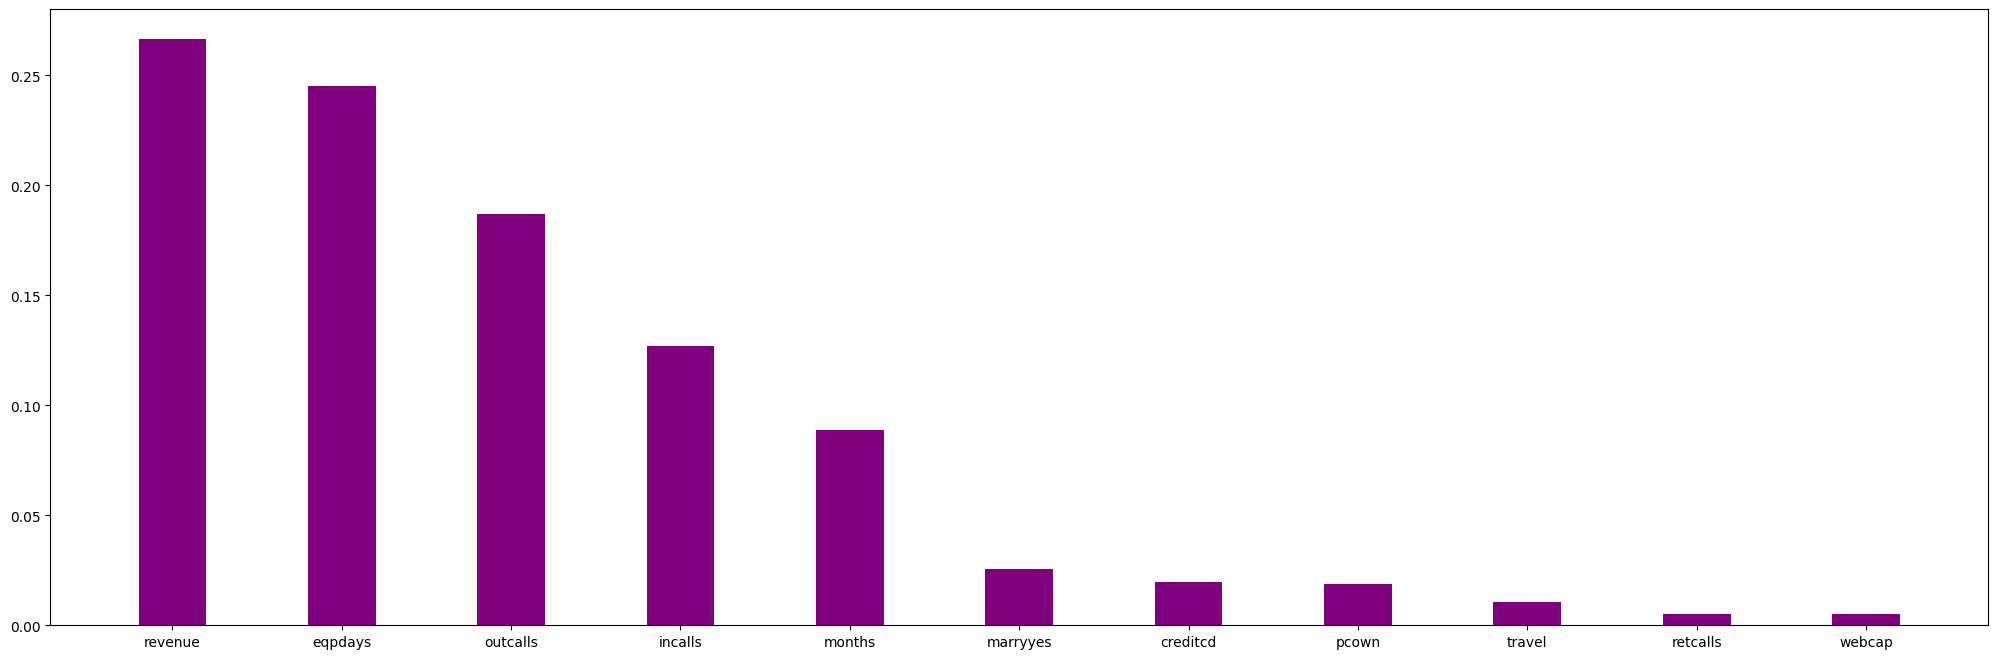

In [6]:
# Place your code here
import matplotlib.pyplot as plt
feature_importance = {}
for importance, name in sorted(zip(dtc.feature_importances_, train_X),reverse=True):
    feature_importance[name]=importance
    
plt.figure(figsize=(25,8))
print(feature_importance)
plt.bar(feature_importance.keys(), feature_importance.values(), color ='purple', width = 0.4)

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [7]:
df_corr = df[["revenue","eqpdays", "outcalls","churndep"]]
df_corr.corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.222074,0.500709,-0.013370
eqpdays,-0.222074,1.000000,-0.244112,0.112821
outcalls,0.500709,-0.244112,1.000000,-0.037071
churndep,-0.013370,0.112821,-0.037071,1.000000


Top 3 drivers of churn are revenue, outcalls and eqpdays of the company 
revenue <-> churndep  -0.013370    negative
outcalls<-> churndep  -0.037071    negative
eqpdays <-> churndep  +0.112821    positive

Revenue is negatively correlated that means higher the revenue(Mean monthly revenue in dollars) lower the churndep, 
similarly outcalls and churndep are also negatively correlated,
eqpdays and churndep are positively correlated that is higher eqpdays then higher churndep

Revenue:
Revenue is negatively correlated that means higher the revenue lower the churndep
It makes sense that if the revenue is high for the company then churndep is low as the clients will trust the company lot more since profits are flowing in
Another relation could be that if revenue is flowing in it means clients are flushing the money in so high revenue means low number of clients are leaving and lot of clients are currently paying

Outcalls:
Outcalls being negatively correlated also makes sense as it means Mean number of outbound voice calls with the client is lot so client feels a lot more reliable of the company so churndep is lower.

Eqpdays:
Number of days the customer has had his/her current equipment : positively correlated which means higher the no of days the customer has their equipment, higher the churndep. May be the equipment becomes faulty after few days and there are no proper customer service because of which the customer tends to leave.


5\. Using the classifier built in 1.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(2 Points)

In [8]:
# Place your code here
# Place your code here
from sklearn.metrics import accuracy_score
predtest_Y = dtc.predict(test_X)
print("Test Accuracy", accuracy_score(test_Y, predtest_Y))

predtrain_Y = dtc.predict(train_X)
print("Train Accuracy", accuracy_score(train_Y, predtrain_Y))

Test Accuracy 0.5409794468409034
Train Accuracy 0.999780914525367


### **Part 2 - Finding a Good Decision Tree (Total 10 Points)**


The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

```
min_samples_leaf: int, float, optional (default=1)
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
min_samples_leaf is also used to control over-fitting by defining that each leaf has more than one element. Thus ensuring that the tree cannot overfit the training dataset by creating a bunch of small branches exclusively for one sample each. In reality, what this is actually doing is simply just telling the tree that each leaf doesn’t have to have an impurity of 0

min_samples_split: int or float, default=2
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.



```

2\. Explain in words your reasoning for choosing the above ranges.


```
min_samples_leaf
Chose a range between 100-1750 with a difference of 250 because since we have a dataset of 22k and only 2 classes to predict with only 5 features that contribute to the predictions - revenue, eqpdays, outcalls, incalls and months - the child nodes definitely can have a minimum of range 100 and can go higher as the dataset will be majorly split by 5 features split - this will also prevent overfitting and generalising the model

min_samples_split
Chose the same range as we don't want the dataset to overfit on the training sample and having the less than 100 would not only overfit but will also create a complex tree with multiple nodes and for 5 contributing features a shallow tree would be sufficient with multiple samples grouped together in a node
```

*Place your response here*


3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

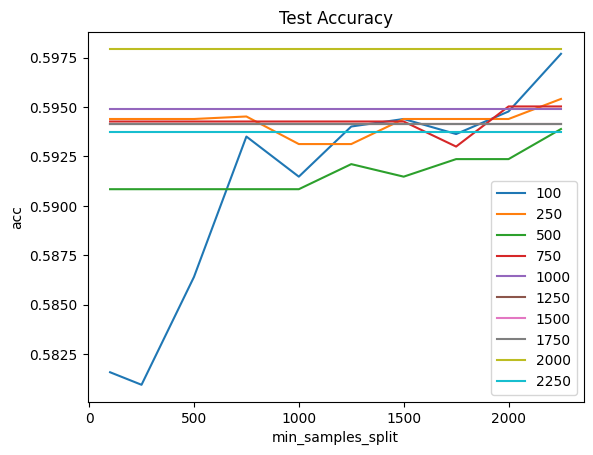

In [9]:
# Place your code here
min_samples_split = [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250] 
min_samples_leaf =[100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250] 
j=0


for i in range(len(min_samples_leaf)):
    acc_lis = []
    for j in range(len(min_samples_split)):
        dtc = DecisionTreeClassifier(random_state=0, min_samples_split=min_samples_split[j],min_samples_leaf=min_samples_leaf[i]).fit(train_X, train_Y)
        predtest_Y = dtc.predict(test_X)
        acc = accuracy_score(test_Y, predtest_Y)
        acc_lis.append(acc)
    
    line = plt.plot(min_samples_split, acc_lis, label = str(min_samples_leaf[i]))
    
plt.xlabel("min_samples_split")
plt.ylabel("acc")
plt.legend()
plt.title("Test Accuracy")
plt.show()


4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

Best configuration is when min_samples_split is 2000 and min_samples_leaf is 100 
and accuracy is around 60.5%

*Place your response here*

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

I would use this model to periodically check which customer/client might have a tendency to get churned and take precautionary measure beforehand.
For example if the model predicts a client/customer is going to leave and then we can always increase outbound and inbound calls as that might make the customer feel they're appreciated and stay with the company for longer
or bring in more revenue by transparently showing them how we can improve

I can change my focus to companies that have a greater tendency to drop working with us there by giving them a better service and better deal for them to stay with us longer

### **Part 3: Model selection with cross-validation (5 points)**


In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`). 
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [10]:
from random import randrange

def xValDecisionTree(dataset, label, k, max_depth_sequence):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    df_split = np.array_split(dataset, k)
    train_split = pd.DataFrame()
    acc_dict = {}
    for i in range(0,k):
        test_split = pd.DataFrame(df_split[i])
        for j in range(k):
            if i!= j:
                train_split = pd.concat([pd.DataFrame(df_split[j]), train_split])
        acc_lis = []        
        depth_lis = []
        
        train_X = train_split.loc[:, train_split.columns != label]
        train_Y = train_split[label]


        test_X = test_split.loc[:, test_split.columns != label]
        test_Y = test_split[label]


        for value in max_depth_sequence:
            dtc = DecisionTreeClassifier(random_state=0, max_depth=value,  criterion='entropy' ).fit(train_X, train_Y)
            predtest_Y = dtc.predict(test_X)
            acc = accuracy_score(test_Y, predtest_Y)
            acc_lis.append(acc)
            depth_lis.append(value)
            if value not in acc_dict.keys():
                acc_dict[value] = []
            acc_dict[value].append(acc)
        plt.show()
        
    return acc_dict


2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [11]:
# Place your code here
#2.
max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]
accs_dict = xValDecisionTree(df, "churndep", 10,  max_depth_sequence)
pprint(accs_dict)

{None: [0.5261044176706827,
        1.0,
        0.9997489959839357,
        0.9997489329651017,
        1.0,
        0.9994978659302034,
        0.9992467988953051,
        1.0,
        0.9997489329651017,
        0.9994978659302034],
 2: [0.5911144578313253,
     0.5753012048192772,
     0.5700301204819277,
     0.5761988450916394,
     0.5842329902083856,
     0.5819733868943008,
     0.5721817725332664,
     0.5902585990459452,
     0.6010544815465729,
     0.5824755209640974],
 4: [0.6019076305220884,
     0.5896084337349398,
     0.5868473895582329,
     0.5877479286969621,
     0.5912628671855386,
     0.5972884760230982,
     0.5937735375345217,
     0.6073311574190309,
     0.6118503640472006,
     0.5937735375345217],
 8: [0.5971385542168675,
     0.5946285140562249,
     0.6069277108433735,
     0.5980416771277931,
     0.6015566156163695,
     0.6073311574190309,
     0.5997991463720813,
     0.62239517951293,
     0.6201355761988451,
     0.6108460959076073],
 16: [0.57404

In [12]:
accs_df = pd.DataFrame.from_dict(accs_dict)
accs_df

,NaN,2.0,4.0,8.0,16.0,32.0,128.0,256.0,512.0
0,0.526104,0.591114,0.601908,0.597139,0.574046,0.530622,0.526104,0.526104,0.526104
1,1.000000,0.575301,0.589608,0.594629,0.664659,0.929970,1.000000,1.000000,1.000000
2,0.999749,0.570030,0.586847,0.606928,0.681476,0.936245,0.999749,0.999749,0.999749
3,0.999749,0.576199,0.587748,0.598042,0.672106,0.935727,0.999749,0.999749,0.999749
4,1.000000,0.584233,0.591263,0.601557,0.682902,0.944012,1.000000,1.000000,1.000000
5,0.999498,0.581973,0.597288,0.607331,0.688928,0.946774,0.999498,0.999498,0.999498
6,0.999247,0.572182,0.593774,0.599799,0.703490,0.945267,0.999247,0.999247,0.999247
7,1.000000,0.590259,0.607331,0.622395,0.712277,0.948531,1.000000,1.000000,1.000000
8,0.999749,0.601054,0.611850,0.620136,0.707005,0.949284,0.999749,0.999749,0.999749
9,0.999498,0.582476,0.593774,0.610846,0.696962,0.946272,0.999498,0.999498,0.999498


3. The maximum accuracy in the val set is 0.999498 when max_depth = None, 128, 256, 512

In [13]:
#3
describe_df = accs_df.describe()
describe_df.loc['mean-std'] = describe_df.loc['mean'] - describe_df.loc['std']
describe_df.loc['mean+std'] = describe_df.loc['mean'] + describe_df.loc['std']
describe_df


,NaN,2.0,4.0,8.0,16.0,32.0,128.0,256.0,512.0
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.952359,0.582482,0.596139,0.605880,0.678385,0.901270,0.952359,0.952359,0.952359
std,0.149771,0.009635,0.008440,0.009568,0.039719,0.130389,0.149771,0.149771,0.149771
min,0.526104,0.570030,0.586847,0.594629,0.574046,0.530622,0.526104,0.526104,0.526104
25%,0.999498,0.575526,0.590022,0.598481,0.674449,0.935856,0.999498,0.999498,0.999498
50%,0.999749,0.582224,0.593774,0.604242,0.685915,0.944640,0.999749,0.999749,0.999749
75%,0.999937,0.588752,0.600753,0.609967,0.701858,0.946648,0.999937,0.999937,0.999937
max,1.000000,0.601054,0.611850,0.622395,0.712277,0.949284,1.000000,1.000000,1.000000
mean-std,0.802588,0.572847,0.587699,0.596312,0.638666,0.770882,0.802588,0.802588,0.802588
mean+std,1.102130,0.592117,0.604579,0.615448,0.718105,1.031659,1.102130,1.102130,1.102130


4. The range(mean-std and mean+std) is teh same for depth = None, 128, 256, 512 range:(0.803 - 1.102)
Standard deviation here shows how the data in folds are distributed that is if the std of accuracy is low then it means that the data in the trainset and val set have been learnt uniformly and there is no overfit.
If the std is high which means that the training has been overfit on the train fold and in the val fold the accuracy is not being able to replicate.

Like example take max_depth 16 and when fold 0 was val fold; accuracy was 0.59 whereas when fold 1 was used as val fold accuracy jumped to 0.67 which means the data in val fold 0 is a little different from the data in the training that implies for max_depth 16 the model is overfitting to the training folds and is extremely dependant on it because of which val fold accuracy starts fluctuating

5. The range(mean - std to mean + std) is the same for depth = None, 128, 256 and 512 its the same range that is 0.803 - 1.102
It means the data is overfitting to the train data so the val set accuracy is extremely high
So, i'll probably take the next best accuracy that is with value 16.0 or 8.0 as max_depth_sequence
I am inclining more towards 8 because the std is less than 16 which means that accuracy of a set similar to trainset will be in the smaller range from 0.596 - 0.62
unlike 16 which has a larger range which means features learnt with max_depth =16 did not help in predicting val fold - overfit to the training fold.

In [14]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=None,  criterion='entropy' ).fit(train_X, train_Y)
predtest_Y = dtc.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print("For max_depth = None Acc = ",acc) 


dtc = DecisionTreeClassifier(random_state=0, max_depth=256,  criterion='entropy' ).fit(train_X, train_Y)
predtest_Y = dtc.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print("For max_depth = 256 Acc = ",acc)

dtc = DecisionTreeClassifier(random_state=0, max_depth=512,  criterion='entropy' ).fit(train_X, train_Y)
predtest_Y = dtc.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print("For max_depth = 512 Acc = ",acc)

For max_depth = None Acc =  0.5385688911443796
For max_depth = 256 Acc =  0.5385688911443796
For max_depth = 512 Acc =  0.5385688911443796


This shows how the test data is not performing that great on the best performing model in the train data as those iteration are over fitting,
whereas the one with max_depth of 16 has generalised well so performs better than max_depth = None, 128, 256, 512

and highest for max_depth = 8

In [15]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=16,  criterion='entropy' ).fit(train_X, train_Y)
predtest_Y = dtc.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print("For max_depth = 16 Acc = ",acc)

For max_depth = 16 Acc =  0.5749809692971327


In [16]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=32,  criterion='entropy' ).fit(train_X, train_Y)
predtest_Y = dtc.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print("For max_depth = 32 Acc = ",acc)

For max_depth = 32 Acc =  0.5383151484394824


In [17]:
dtc = DecisionTreeClassifier(random_state=0, max_depth=8,  criterion='entropy' ).fit(train_X, train_Y)
predtest_Y = dtc.predict(test_X)
acc = accuracy_score(test_Y, predtest_Y)
print("For max_depth = 8 Acc = ",acc)

For max_depth = 8 Acc =  0.5912205024105557


### **Part 4: Boosting (5 Points)**


Now, as we covered in class, ensemble methods are often used to improve performance. 

1. Implement the boosting algorithm: XGBoost for the same `cell2cell_data.csv` task as above. You will have to select how to tune hyperparameters. Besides depth, which other hyperparametrs do you optimize for? (2 points)

```
XGBoost hyperparameters

General Parameters 
booster 
gbtree defaut which is okay as it is used for tree based xgboost


Booster Parameters
eta 
It is the step size shrinkage used in update to prevent overfitting. 
Range : [0,1] Typical final values : 0.01-0.2.\n
Default : 0
    
gamma 
A node is split only when the resulting split gives a positive reduction in the loss function. The larger gamma is, the more conservative the algorithm will be.
Range: [0,∞]
Default : 0
    
max_depth - used 3 because mostly there are 3 major features that is eqpdays, revenue, outcalls
It is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
range: [0,∞] (0 is only accepted in lossguided growing policy when tree_method is set as hist.
default =6


min_child_weight - for overfitting we have modified tree depth etc
It defines the minimum sum of weights of all observations required in a child.
range: [0,∞]
It is used to control over-fitting.
Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
default=1


max_delta_step - churndep is not biased(0: 15991 1: 15951) so not using this
In maximum delta step we allow each tree’s weight estimation to be.
Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
Set it to value of 1-10 might help control the update.
range: [0,∞]
default=0


subsample   - Want to give this default because this is too much rules on the tree
It denotes the fraction of observations to be randomly samples for each tree.
Subsample ratio of the training instances.
Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. - This will prevent overfitting.
Typical values: 0.5-1
range: (0,1]

lambda - 1 is good enough
L2 regularization term on weights (analogous to Ridge regression).
This is used to handle the regularization part of XGBoost.
Increasing this value will make model more conservative.
default=1


alpha - No need this because less features and we don't need feature sleection here
L1 regularization term on weights (analogous to Lasso regression).
It can be used in case of very high dimensionality so that the algorithm runs faster when implemented.
Increasing this value will make model more conservative.
default=0


tree_method - auto takes care of which one to choose based on dataset size so no need of change
Choices: auto, exact, approx, hist, gpu_hist
auto: Use heuristic to choose the fastest method.
For small to medium dataset, exact greedy (exact) will be used.
For very large dataset, approximate algorithm (approx) will be chosen.
Because old behavior is always use exact greedy in single machine, user will get a message when approximate algorithm is chosen to notify this choice.
exact: Exact greedy algorithm.
approx: Approximate greedy algorithm using quantile sketch and gradient histogram.
hist: Fast histogram optimized approximate greedy algorithm. It uses some performance improvements such as bins caching.
gpu_hist: GPU implementation of hist algorithm.
default= auto


scale_pos_weight - No need as classes are balanced for us
It controls the balance of positive and negative weights,
It is useful for imbalanced classes.
A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
A typical value to consider: sum(negative instances) / sum(positive instances).
default=1


max_leaves  - too much interference to the tree so no need
Maximum number of nodes to be added.
Only relevant when grow_policy=lossguide is set.


Learning Task Parameters 

objective  - binary:logistic because this is binary classification
reg:logistic : logistic regression
binary:logistic : logistic regression for binary classification, output probability
binary:logitraw: logistic regression for binary classification, output score before logistic transformation
binary:hinge : hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.
multi:softmax : set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
multi:softprob : same as softmax, but output a vector of ndata nclass, which can be further reshaped to ndata nclass matrix. The result contains predicted probability of each data point belonging to each class.
default=reg:squarederror

eval_metric - default metrics makes sense
The metric to be used for validation data.
The default values are rmse for regression, error for classification and mean average precision for ranking.


```



*Place your answer here regarding hyperparameters.*

In [18]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_X, train_Y)
y_pred = xgb_model.predict(test_X)
acc = accuracy_score(test_Y, y_pred)
print(acc)


0.5825932504440497


Method 1 : Manual change based on understanding

[0]	validation_0-error:0.40762	validation_0-logloss:0.68130	validation_1-error:0.40624	validation_1-logloss:0.68073
[1]	validation_0-error:0.40537	validation_0-logloss:0.67523	validation_1-error:0.40358	validation_1-logloss:0.67434
[2]	validation_0-error:0.41235	validation_0-logloss:0.67201	validation_1-error:0.41373	validation_1-logloss:0.67128
[3]	validation_0-error:0.40446	validation_0-logloss:0.66949	validation_1-error:0.40396	validation_1-logloss:0.66912
[4]	validation_0-error:0.41166	validation_0-logloss:0.66813	validation_1-error:0.41474	validation_1-logloss:0.66821
[5]	validation_0-error:0.40371	validation_0-logloss:0.66641	validation_1-error:0.40472	validation_1-logloss:0.66672
[6]	validation_0-error:0.40262	validation_0-logloss:0.66548	validation_1-error:0.40256	validation_1-logloss:0.66606
[7]	validation_0-error:0.40080	validation_0-logloss:0.66454	validation_1-error:0.40129	validation_1-logloss:0.66555
[8]	validation_0-error:0.40115	validation_0-logloss:0.66347	validation_1

/Users/yamini/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-error:0.39586	validation_0-logloss:0.65895	validation_1-error:0.40434	validation_1-logloss:0.66386
[19]	validation_0-error:0.39526	validation_0-logloss:0.65845	validation_1-error:0.40332	validation_1-logloss:0.66366
[20]	validation_0-error:0.39470	validation_0-logloss:0.65796	validation_1-error:0.40409	validation_1-logloss:0.66337
[21]	validation_0-error:0.39442	validation_0-logloss:0.65762	validation_1-error:0.40383	validation_1-logloss:0.66344
[22]	validation_0-error:0.39282	validation_0-logloss:0.65732	validation_1-error:0.40573	validation_1-logloss:0.66356
[23]	validation_0-error:0.39257	validation_0-logloss:0.65720	validation_1-error:0.40510	validation_1-logloss:0.66345
[24]	validation_0-error:0.39216	validation_0-logloss:0.65700	validation_1-error:0.40459	validation_1-logloss:0.66359
[25]	validation_0-error:0.39223	validation_0-logloss:0.65688	validation_1-error:0.40459	validation_1-logloss:0.66369
[26]	validation_0-error:0.39132	validation_0-logloss:0.65651	val

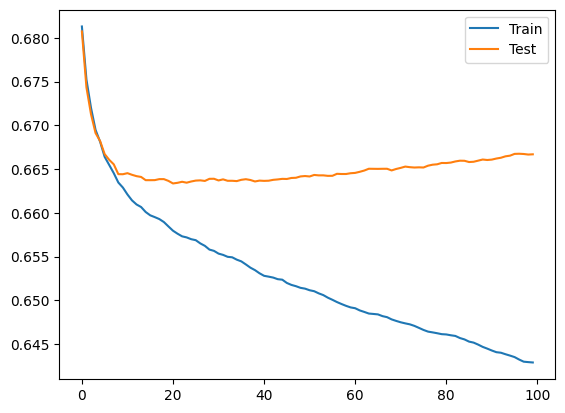

In [19]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(booster = 'dart', eta = 0.3, max_depth = 3, objective="binary:logistic")
eval_set = [(train_X, train_Y), (test_X, test_Y)]
xgb_model.fit(train_X, train_Y, eval_set=eval_set, eval_metric=["error", "logloss"])
y_pred = xgb_model.predict(test_X)
acc = accuracy_score(test_Y, y_pred)
print(acc)

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

Testing log loss is increasing in test after sometime, which might be because of overfitting on the training data and so we'll reduce the max_depth from 3 to 2

[0]	validation_0-error:0.41748	validation_0-logloss:0.68375	validation_1-error:0.41804	validation_1-logloss:0.68314
[1]	validation_0-error:0.41304	validation_0-logloss:0.67849	validation_1-error:0.41322	validation_1-logloss:0.67810
[2]	validation_0-error:0.41304	validation_0-logloss:0.67501	validation_1-error:0.41335	validation_1-logloss:0.67430
[3]	validation_0-error:0.41263	validation_0-logloss:0.67296	validation_1-error:0.41284	validation_1-logloss:0.67247
[4]	validation_0-error:0.41263	validation_0-logloss:0.67171	validation_1-error:0.41284	validation_1-logloss:0.67123
[5]	validation_0-error:0.41251	validation_0-logloss:0.67023	validation_1-error:0.41373	validation_1-logloss:0.66938
[6]	validation_0-error:0.41216	validation_0-logloss:0.66935	validation_1-error:0.41373	validation_1-logloss:0.66884
[7]	validation_0-error:0.41194	validation_0-logloss:0.66868	validation_1-error:0.41360	validation_1-logloss:0.66809
[8]	validation_0-error:0.41197	validation_0-logloss:0.66822	validation_1

/Users/yamini/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-error:0.40434	validation_0-logloss:0.66457	validation_1-error:0.40726	validation_1-logloss:0.66598
[17]	validation_0-error:0.40393	validation_0-logloss:0.66428	validation_1-error:0.40662	validation_1-logloss:0.66577
[18]	validation_0-error:0.40428	validation_0-logloss:0.66407	validation_1-error:0.40675	validation_1-logloss:0.66557
[19]	validation_0-error:0.40246	validation_0-logloss:0.66374	validation_1-error:0.40497	validation_1-logloss:0.66497
[20]	validation_0-error:0.40215	validation_0-logloss:0.66349	validation_1-error:0.40345	validation_1-logloss:0.66483
[21]	validation_0-error:0.40215	validation_0-logloss:0.66334	validation_1-error:0.40332	validation_1-logloss:0.66493
[22]	validation_0-error:0.40218	validation_0-logloss:0.66315	validation_1-error:0.40472	validation_1-logloss:0.66486
[23]	validation_0-error:0.40233	validation_0-logloss:0.66294	validation_1-error:0.40612	validation_1-logloss:0.66476
[24]	validation_0-error:0.40202	validation_0-logloss:0.66256	val

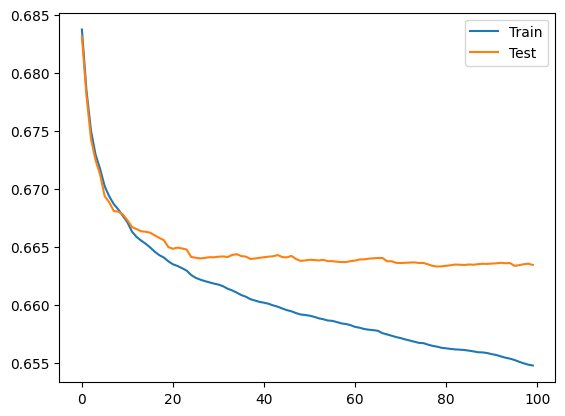

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(booster = 'dart', eta = 0.3, max_depth = 2, objective="binary:logistic")
eval_set = [(train_X, train_Y), (test_X, test_Y)]
xgb_model.fit(train_X, train_Y, eval_set=eval_set, eval_metric=["error", "logloss"])
y_pred = xgb_model.predict(test_X)
acc = accuracy_score(test_Y, y_pred)
print(acc)

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()



Training loss just started to converge so increase no of iterations or increase learning rate
Lets experiment with learning rate

Learning rate parameters vs accuracy

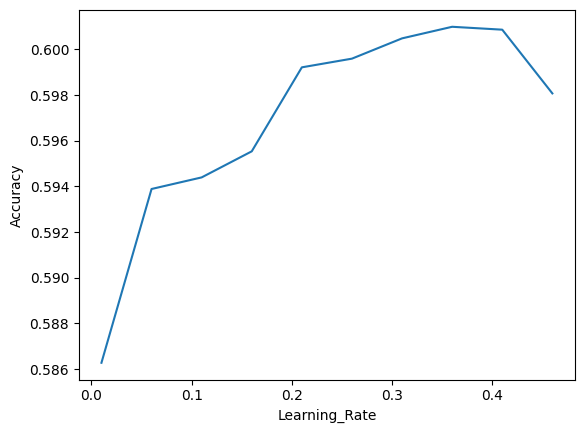

In [21]:
def plot_lr_vs_acc(train_X, train_Y, test_X, test_Y):    
    acc_lis = []
    eta =[]
    for i in range(1,50,5):
        xgb_model = xgb.XGBClassifier(booster = 'dart', eta = i/100, max_depth = 2, objective="binary:logistic")
        xgb_model.fit(train_X, train_Y)
        y_pred = xgb_model.predict(test_X)
        acc = accuracy_score(test_Y, y_pred)
        eta.append(i/100)
        acc_lis.append(acc)
        
    plt.plot(eta, acc_lis)
    plt.xlabel("Learning_Rate")
    plt.ylabel("Accuracy")
    plt.show()
    
plot_lr_vs_acc(train_X, train_Y, test_X, test_Y)   

Learning rate is peaking at 0.4 so trying that and checking

[0]	validation_0-error:0.41748	validation_0-logloss:0.68135	validation_1-error:0.41804	validation_1-logloss:0.68053
[1]	validation_0-error:0.41304	validation_0-logloss:0.67593	validation_1-error:0.41322	validation_1-logloss:0.67541
[2]	validation_0-error:0.41304	validation_0-logloss:0.67253	validation_1-error:0.41335	validation_1-logloss:0.67165
[3]	validation_0-error:0.41219	validation_0-logloss:0.67099	validation_1-error:0.41322	validation_1-logloss:0.67055
[4]	validation_0-error:0.41244	validation_0-logloss:0.66962	validation_1-error:0.41271	validation_1-logloss:0.66920
[5]	validation_0-error:0.41241	validation_0-logloss:0.66825	validation_1-error:0.41259	validation_1-logloss:0.66742
[6]	validation_0-error:0.40803	validation_0-logloss:0.66753	validation_1-error:0.41018	validation_1-logloss:0.66718
[7]	validation_0-error:0.40809	validation_0-logloss:0.66680	validation_1-error:0.41005	validation_1-logloss:0.66675
[8]	validation_0-error:0.40791	validation_0-logloss:0.66624	validation_1

/Users/yamini/Library/Python/3.8/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-error:0.40165	validation_0-logloss:0.66278	validation_1-error:0.40345	validation_1-logloss:0.66450
[17]	validation_0-error:0.40115	validation_0-logloss:0.66258	validation_1-error:0.40434	validation_1-logloss:0.66455
[18]	validation_0-error:0.40074	validation_0-logloss:0.66230	validation_1-error:0.40586	validation_1-logloss:0.66443
[19]	validation_0-error:0.40039	validation_0-logloss:0.66214	validation_1-error:0.40561	validation_1-logloss:0.66457
[20]	validation_0-error:0.40008	validation_0-logloss:0.66182	validation_1-error:0.40510	validation_1-logloss:0.66467
[21]	validation_0-error:0.39986	validation_0-logloss:0.66167	validation_1-error:0.40599	validation_1-logloss:0.66459
[22]	validation_0-error:0.39999	validation_0-logloss:0.66150	validation_1-error:0.40459	validation_1-logloss:0.66453
[23]	validation_0-error:0.39980	validation_0-logloss:0.66133	validation_1-error:0.40650	validation_1-logloss:0.66449
[24]	validation_0-error:0.39936	validation_0-logloss:0.66109	val

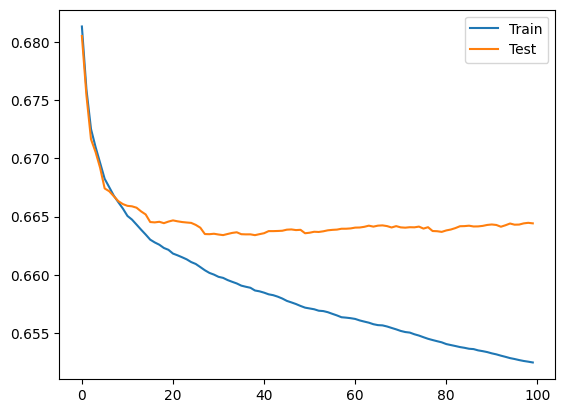

In [28]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(booster = 'dart', eta = 0.4, max_depth = 2, objective="binary:logistic")
eval_set = [(train_X, train_Y), (test_X, test_Y)]
xgb_model.fit(train_X, train_Y, eval_set=eval_set, eval_metric=["error", "logloss"])
y_pred = xgb_model.predict(test_X)
acc = accuracy_score(test_Y, y_pred)
print(acc)

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()


Learning rate 0.3 is 0.597 whereas learning rate 0.4 is 0.600 - there is a slight difference and this tuning is as well on the test set 
So there might be a good chance that since this model is specifically tuned on test data so any other data which is slightly different from test data might predict with a lower accuracy

Method 2 : GridSearchCV

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(train_X, train_Y)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [24]:
grid_search.score(test_X, test_Y)


0.6316219155688723

In [29]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140}

Best performing model is 63% at learning rate 0.05 and n_estimator = 140

2. Now compare the XGBoost performance to the decision tree implementation from part 3. Describe in text how they compare, and if this aligns with what you expect. (3 points)

# Place your code here
```
Decision tree was over fitting for max_depth of None, 128, 256 and 512 so I took max_depth of 16 and the test set was performing around 60% whereas xgboost is around 60% with method 1 and 63% in method 2


XGBoost Features
Regularized Learning: Regularization term helps to smooth the final learnt weights to avoid over-fitting. The regularized objective will tend to select a model employing simple and predictive functions.
Gradient Tree Boosting: The tree ensemble model cannot be optimized using traditional optimization methods in Euclidean space. Instead, the model is trained in an additive manner.
Shrinkage and Column Subsampling: Besides the regularized objective, two additional techniques are used to further prevent overfitting. The first technique is shrinkage introduced by Friedman. Shrinkage scales newly added weights by a factor η after each step of tree boosting. Similar to a learning rate in stochastic optimization, shrinkage reduces the influence of each tree and leaves space for future trees to improve the model. 
XGBoost is an ensemble learning method

In the case of boosting, the decision tree followed a sequential chain for learning. Each split sub-parts gets trained from its forerunner, and any kind of error existing in the current part gets rectified and leads to the next sub-part.
The above description clarifies that in the case of boosting techniques, the initial stage base learner holds a weaker nature and continues to generate stronger variants of learners as the tree expands. Each of the strong learners provides crucial data for final prediction. Sometimes, to generate more strong learner variants, several weak and stronger learners are fused.
-Regularisation
-Weighted quantile sketch
-Block structure for parallel learning:


Comparison:

XgBoost was bound to do better as it builds multiple trees - Each new tree is built to improve on the deficiencies of the previous trees and this concept is called boosting.
when compared to 
Decision tree that has only one tree so its deficiency lies there with no other chance for it to change itself


XgBoost also uses gradient of the previous tree into the new tree which helps in learning and retaining previous tree information
unlike Decision tree that has only one tree which gives less flexibility to learn


```

## End of homework